# Final project
- Name: Ryan Sahar
- USC ID: 3018543452

Notes: The goal of this project is to measure the storage capacity and robustness to noise of Hopfield-type Associative Memories. You should fill in the coding tasks in the ```TODO``` blocks like this:

In [61]:
# ===== TODO: xxxxx ===== #

# ===== End of TODO: xxxxx ===== #

There are a couple of short answer questions in ```Extra Credit``` section. You can double click on ```Enter your answer here:``` to fill in your answers.

You must submit Extra Credit along with your main project. If you submit Extra Credit Late, your whole project will be late.

The project can be submitted until 11:59 PM of the day of the deadline with 20% penalty. Any change in the project after the deadline is considered late submission. One second late is late. The project is graded based on when it was submitted, not when it was finished. Homework late days cannot be used for the project.

In [62]:
import numpy as np
import matplotlib.pyplot as plt

# ===== TODO (Optional) : import other libraries here ===== #

# ===== End of TODO (Optional) : import other libraries here ===== #

## Problem (a)

In [74]:
# Define constants
K = 25 # (Optional) You can change this value
S = 100 # number of neurons
T_max = 100 # maxmimum number of iterations


# Do the following K times
overlap_list = []
for _ in range(K):
    for L in range(1, S + 1):
        
        # (a) i.
        # ===== TODO: create a random matrix X, with random values of +1 or -1 with equal probability ===== #
        X = np.random.choice([-1, 1], size = (S, L))
        # ===== End of TODO: create a random matrix X, with random values of +1 or -1 with equal probability ===== #
        
        # (a) ii.
        # ===== TODO: Calculate W matrix ===== #
        W = np.zeros((S, S))
        for l in range(L):
            W += np.outer(X[:, l], X[:, l])
        np.fill_diagonal(W, 0)
        # ===== End of TODO: Calculate W matrix ===== #
        
        # (a) iii.
        # ===== TODO: initial output pattern ===== #
        initial_pattern = X[:, np.random.randint(L)]
        a = initial_pattern.copy()
        # ===== End of TODO: initial output pattern ===== #
        
        # ===== TODO: Update `a` with `T_max` iterations until converge ===== #
        for _ in range(T_max):
            a_next = np.sign(W @ a)
            if np.array_equal(a_next, a):
                break
            a = a_next
        # ===== End of TODO: Update `a` with `T_max` iterations until converge ===== #

        
    # Store overlap
    # ===== TODO: calculate overlap ===== #
        overlap = np.sum(a == initial_pattern) / S
    # ===== End of TODO: calculate overlap ===== #

        overlap_list.append(overlap)

## Problem (b)

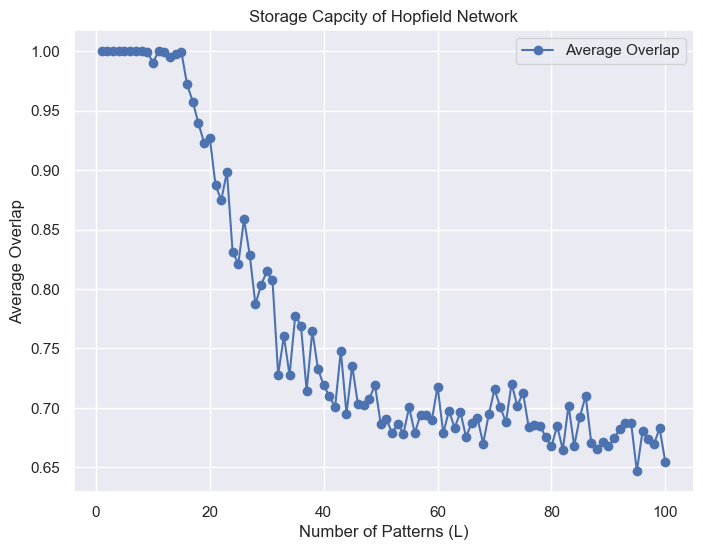

In [75]:
# ===== TODO: plot L vs. overlaps ===== #
L_values = list(range(1, S + 1))

average_overlaps = [sum(overlap_list[i::S]) / K for i in range(S)]

plt.figure(figsize=(8,6))
plt.plot(L_values, average_overlaps, marker = 'o', linestyle = '-', color = 'b', label = 'Average Overlap')
plt.title("Storage Capcity of Hopfield Network")
plt.xlabel("Number of Patterns (L)")
plt.ylabel("Average Overlap")
plt.grid(True)
plt.legend()
plt.show()
# ===== End of TODO: plot L vs. overlaps ===== #

## Problem (c)

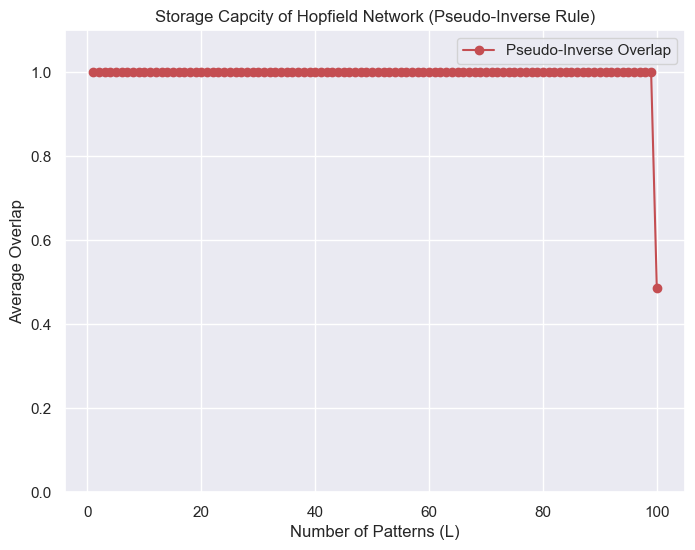

In [76]:
# ===== TODO: repeat (a) and (b) with pseudo-inverse learning rule ===== #
# Define constants
K = 25 # (Optional) You can change this value
S = 100 # number of neurons
T_max = 100 # maxmimum number of iterations


overlap_list_pseudo = []
for _ in range(K):
    for L in range(1, S + 1):
        
        # (a) i.
        # ===== TODO: create a random matrix X, with random values of +1 or -1 with equal probability ===== #
        X = np.random.choice([-1, 1], size = (S, L))
        # ===== End of TODO: create a random matrix X, with random values of +1 or -1 with equal probability ===== #
        
        # (a) ii.
        # ===== TODO: Calculate W matrix ===== #
        X_pinv = np.linalg.pinv(X)
        W = X @ X_pinv
        np.fill_diagonal(W, 0)
        # ===== End of TODO: Calculate W matrix ===== #
        
        # (a) iii.
        # ===== TODO: initial output pattern ===== #
        initial_pattern = X[:, np.random.randint(L)]
        a = initial_pattern.copy()
        # ===== End of TODO: initial output pattern ===== #
        
        # ===== TODO: Update `a` with `T_max` iterations until converge ===== #
        for _ in range(T_max):
            a_next = np.sign(W @ a)
            if np.array_equal(a_next, a):
                break
            a = a_next
        # ===== End of TODO: Update `a` with `T_max` iterations until converge ===== #

        
    # Store overlap
    # ===== TODO: calculate overlap ===== #
        overlap = np.sum(a == initial_pattern) / S
    # ===== End of TODO: calculate overlap ===== #

        overlap_list_pseudo.append(overlap)

# ===== TODO: plot L vs. overlaps ===== #
L_values = list(range(1, S + 1))

average_overlaps_pseudo = [sum(overlap_list_pseudo[i::len(L_values)]) / K for i in range(len(L_values))]

plt.figure(figsize=(8,6))
plt.plot(L_values, average_overlaps_pseudo, marker = 'o', linestyle = '-', color = 'r', label = 'Pseudo-Inverse Overlap')
plt.title("Storage Capcity of Hopfield Network (Pseudo-Inverse Rule)")
plt.xlabel("Number of Patterns (L)")
plt.ylim(0, 1.1)
plt.ylabel("Average Overlap")
plt.grid(True)
plt.legend()
plt.show()
# ===== End of TODO: plot L vs. overlaps ===== #
# ===== End of TODO: repeat (a) and (b) with pseudo-inverse learning rule ===== #


## Problem (d)

In [ ]:
# ===== TODO: determine max number of patterns and alpha with both methods ===== #
threshold = 0.9

L_max_hebbian = max([i + 1 for i, avg in enumerate(average_overlaps) if avg > threshold])

L_max_pseudo_inverse = max([i + 1 for i, avg in enumerate(average_overlaps_pseudo) if avg > threshold])
# ===== End of TODO: determine max number of patterns and alpha with both methods ===== #

print(f"With Hebbian method, the maxmimum number of patterns is {L_max_hebbian} and alpha is {L_max_hebbian / S}")
print(f"With Pseudo-inverse method, the maxmimum number of patterns is {L_max_pseudo_inverse} and alpha is {L_max_pseudo_inverse / S}")

With Hebbian method, the maxmimum number of patterns is 20 and alpha is 0.2
With Pseudo-inverse method, the maxmimum number of patterns is 99 and alpha is 0.99


## Extra Credit: Robustness to Noise and Bias
### Problem (a)

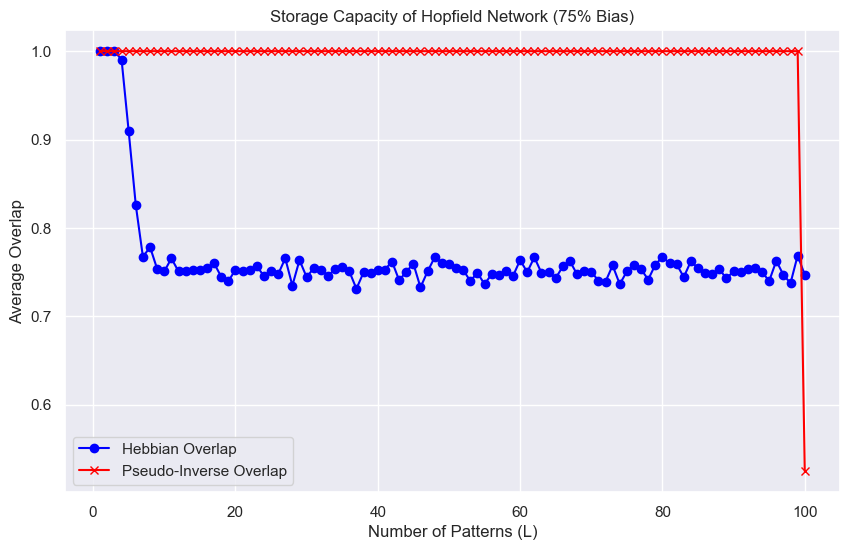

With Hebbian method, L_max = 5, alpha = 0.05
With Pseudo-Inverse method, L_max = 99, alpha = 0.99


In [70]:
# ===== TODO: repeat (a) - (d), increase the prob. of +1 to 75% in X ===== #
K = 25  
S = 100  
T_max = 100  

overlap_list_hebbian = []
overlap_list_pseudo_inverse = []

# Helper Function - Generates biased patterns 
def generate_biased_patterns(S, L, prob=0.75):
    """Generate a random matrix X with biased probabilities of +1 and -1."""
    return np.random.choice([1, -1], size=(S, L), p=[prob, 1 - prob])

# Hebbian Method
for _ in range(K):
    for L in range(1, S + 1):
        X = generate_biased_patterns(S, L)
        
        W = np.zeros((S, S))
        for l in range(L):
            W += np.outer(X[:, l], X[:, l])
        np.fill_diagonal(W, 0)
        
        initial_pattern = X[:, np.random.randint(L)]
        a = initial_pattern.copy()
        
        for _ in range(T_max):
            a_next = np.sign(W @ a)
            if np.array_equal(a_next, a):
                break
            a = a_next
        
        overlap = np.sum(a == initial_pattern) / S
        overlap_list_hebbian.append(overlap)

# Pseudo-Inverse Method
for _ in range(K):
    for L in range(1, S + 1):
        X = generate_biased_patterns(S, L)
        
        X_pinv = np.linalg.pinv(X)
        W = X @ X_pinv
        np.fill_diagonal(W, 0)
        
        initial_pattern = X[:, np.random.randint(L)]
        a = initial_pattern.copy()
        
        for _ in range(T_max):
            a_next = np.sign(W @ a)
            if np.array_equal(a_next, a):
                break
            a = a_next
        
        overlap = np.sum(a == initial_pattern) / S
        overlap_list_pseudo_inverse.append(overlap)

# Plot for both methods
L_values = list(range(1, S + 1))

average_overlaps_hebbian = [sum(overlap_list_hebbian[i::S]) / K for i in range(S)]
average_overlaps_pseudo_inverse = [sum(overlap_list_pseudo_inverse[i::S]) / K for i in range(S)]

plt.figure(figsize=(10, 6))
plt.plot(L_values, average_overlaps_hebbian, label="Hebbian Overlap", color="blue", marker="o")
plt.plot(L_values, average_overlaps_pseudo_inverse, label="Pseudo-Inverse Overlap", color="red", marker="x")
plt.title("Storage Capacity of Hopfield Network (75% Bias)")
plt.xlabel("Number of Patterns (L)")
plt.ylabel("Average Overlap")
plt.legend()
plt.grid(True)
plt.show()

threshold = 0.9
L_max_hebbian = max([i + 1 for i, avg in enumerate(average_overlaps_hebbian) if avg > threshold])
L_max_pseudo_inverse = max([i + 1 for i, avg in enumerate(average_overlaps_pseudo_inverse) if avg > threshold])

print(f"With Hebbian method, L_max = {L_max_hebbian}, alpha = {L_max_hebbian / S}")
print(f"With Pseudo-Inverse method, L_max = {L_max_pseudo_inverse}, alpha = {L_max_pseudo_inverse / S}")
# ===== End of TODO: repeat (a) - (d), increase the prob. of +1 to 75% in X ===== #


#### What do biased patterns do to the storage capacity of the network?

Enter your answer here: Biased patterns help reduce the storage capicity of the network because patterns will start to look too similar to one another. This makes it hard for the network to find the difference between them. This is prominent when using the Hebbian method. So the Pseudo-Inverse mathod works better, but struggles when patterns are too similar. 



### Problem (b)

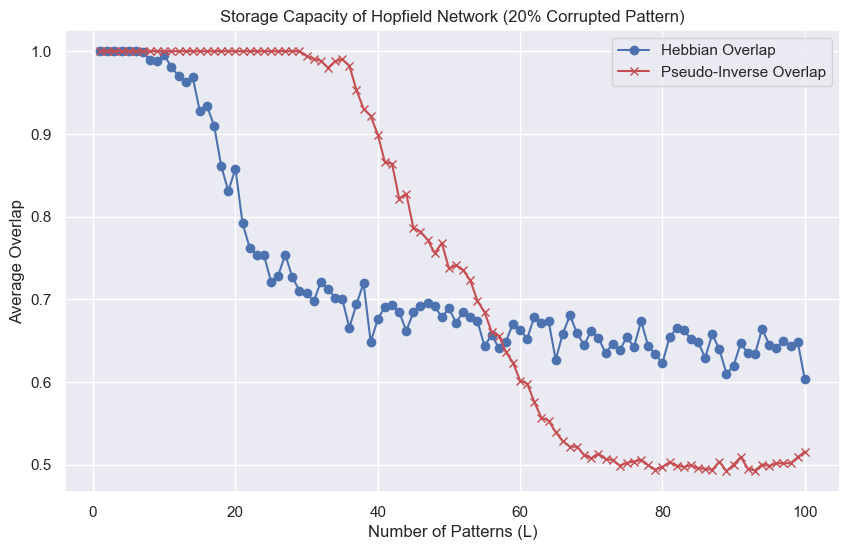

In [71]:
# ===== TODO: repeat (a) - (d), when doing (a) iii, randomly flip 20% of the selected pattern ===== #
K = 25  
S = 100  
T_max = 100  

overlap_list_hebbian = []
overlap_list_pseudo = []

for _ in range(K):
    for L in range(1, S + 1):
        X = np.random.choice([-1, 1], size=(S, L))
        
        W_hebbian = np.zeros((S, S))
        for l in range(L):
            W_hebbian += np.outer(X[:, l], X[:, l])
        np.fill_diagonal(W_hebbian, 0)

        X_pinv = np.linalg.pinv(X)
        W_pseudo = X @ X_pinv
        np.fill_diagonal(W_pseudo, 0)

        selected_pattern = X[:, np.random.randint(L)]
        corrupted_pattern = selected_pattern.copy()
        flip_indices = np.random.choice(S, size=int(0.2 * S), replace=False)
        corrupted_pattern[flip_indices] *= -1

        a_hebbian = corrupted_pattern.copy()
        for _ in range(T_max):
            a_next = np.sign(W_hebbian @ a_hebbian)
            if np.array_equal(a_next, a_hebbian):
                break
            a_hebbian = a_next

        overlap_hebbian = np.sum(a_hebbian == selected_pattern) / S
        overlap_list_hebbian.append(overlap_hebbian)

        a_pseudo = corrupted_pattern.copy()
        for _ in range(T_max):
            a_next = np.sign(W_pseudo @ a_pseudo)
            if np.array_equal(a_next, a_pseudo):
                break
            a_pseudo = a_next

        overlap_pseudo = np.sum(a_pseudo == selected_pattern) / S
        overlap_list_pseudo.append(overlap_pseudo)

L_values = list(range(1, S + 1))
average_overlaps_hebbian = [np.mean(overlap_list_hebbian[i::S]) for i in range(S)]
average_overlaps_pseudo = [np.mean(overlap_list_pseudo[i::S]) for i in range(S)]

plt.figure(figsize=(10, 6))
plt.plot(L_values, average_overlaps_hebbian, label="Hebbian Overlap", marker='o', linestyle='-', color='b')
plt.plot(L_values, average_overlaps_pseudo, label="Pseudo-Inverse Overlap", marker='x', linestyle='-', color='r')
plt.title("Storage Capacity of Hopfield Network (20% Corrupted Pattern)")
plt.xlabel("Number of Patterns (L)")
plt.ylabel("Average Overlap")
plt.legend()
plt.grid(True)
plt.show()

# ===== End of TODO: repeat (a) - (d), when doing (a) iii, randomly flip 20% of the selected pattern ===== #


#### What does such noise do to the storage capacity of the network?

Enter your answer here: Noise helps reduce the storage capacity of the network since it makes it work a lot harder for the network to recall patterns. Adding noise confuses the patterns with each other in the netowork. This means it can't deal with as many patterns in comparison to without noise. 